## Import Library

In [163]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

## Dataset

In [164]:
df = pd.read_csv("vgsales.csv")

df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


Atribut yang Dilatih

In [165]:
data = df[["NA_Sales", "Global_Sales"]]

## Menentukan Jumlah Cluster

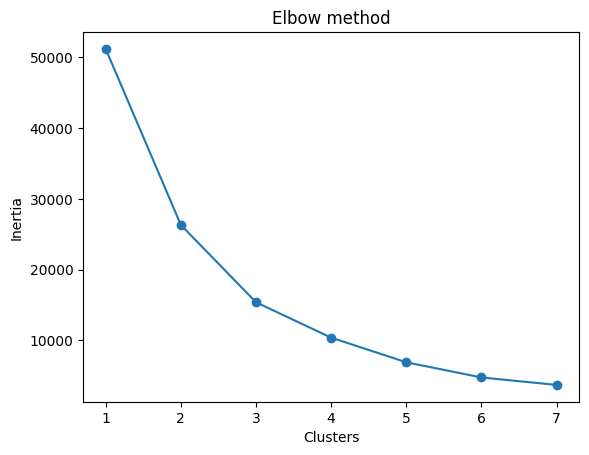

In [166]:
cluster = range(1,8)
inertias = []

for k in cluster:
    model = KMeans(n_clusters=k)
    model.fit(data)
    inertias.append(model.inertia_)

plt.plot(cluster, inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Clusters')
plt.ylabel('Inertia')
plt.show()

## Algoritma K-Means Clustering

Jumlah cluster = 3

In [167]:
model = KMeans(n_clusters=3)

model.fit(data)

KMeans(n_clusters=3)

In [168]:
label = model.labels_

label

array([2, 2, 2, ..., 0, 0, 0])

In [169]:
dataset_KMeans = pd.DataFrame({'cluster':label, 'species':df.Global_Sales})

In [170]:
crosstab = pd.crosstab(dataset_KMeans['cluster'], dataset_KMeans['species'])
crosstab

species,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.10,...,28.31,28.62,29.02,30.01,30.26,31.37,33.00,35.82,40.24,82.74
cluster,,,,,,,,,,,,,,,,,,,,,
0,618,1071,811,645,632,577,510,483,434,400,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1


Centroids

In [171]:
x = data["Global_Sales"]
y = data["NA_Sales"]

centroids = model.cluster_centers_
centroids

array([[ 0.16844581,  0.34135906],
       [ 2.32263699,  4.77035959],
       [13.73      , 27.0624    ]])

In [172]:
centroids_x = centroids[:,0]
centroids_y = centroids[:,1]

## Menampilkan Visualisasi Model

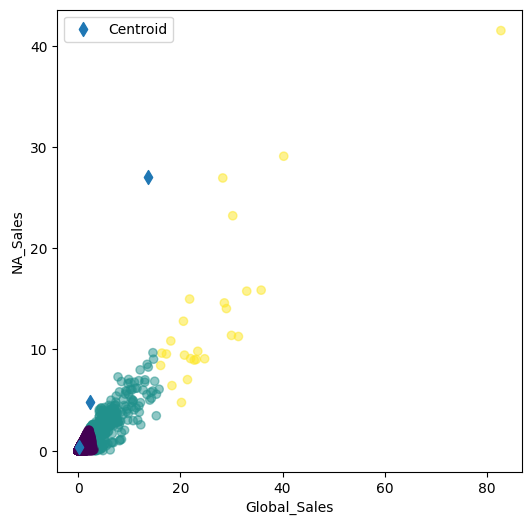

In [173]:
plt.figure(figsize=(6,6))
plt.scatter(x,y,alpha=0.5,c=label)
plt.scatter(centroids_x,centroids_y,marker="d",s=50,label="Centroid")
plt.xlabel("Global_Sales")
plt.ylabel("NA_Sales")
plt.legend()
plt.show()